**Overall Comparison:**

Propensity to Give (Lapsed vs. Other Alumni)

**What It Shows:**

This bar chart compares the average propensity to give between lapsed alumni (red) and other alumni (blue).

Each bar represents the mean value of Propensity to Give (binary: 0 or 1) in each group.

**Key Observations:**

Lapsed alumni have a lower average propensity to give than other alumni.

This suggests that once alumni lapse, they are less likely to donate again compared to their continuously engaged peers.

<ipython-input-1-411f4c6bc904>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lapsed_clean[propensity_col] = df_lapsed_clean[propensity_col].astype(int)
<ipython-input-1-411f4c6bc904>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Other Alumni", "Lapsed"],


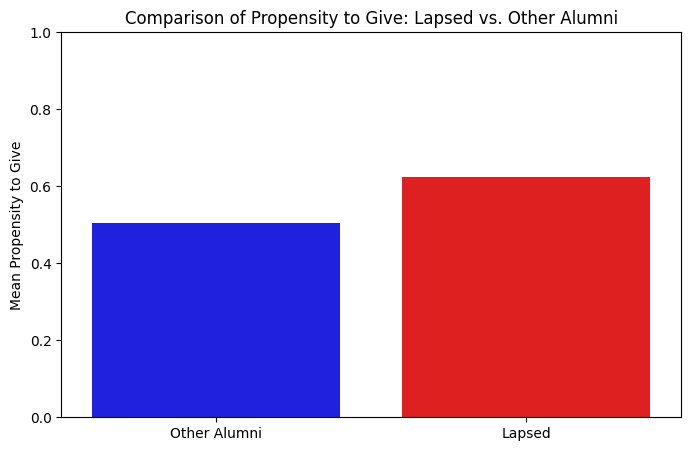

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "/content/Task 2.xlsx"
xls = pd.ExcelFile(file_path)

# Load both sheets into DataFrames
df_other = pd.read_excel(xls, sheet_name="Other")
df_lapsed = pd.read_excel(xls, sheet_name="Lapsed but returned")

# Define the correct column names
propensity_col = "Propensity to Give (Giver, Fndn Assn or Officer, NFP Board)"
age_col = "Age Range"

# Remove blank values in "Propensity to Give"
df_other_clean = df_other.dropna(subset=[propensity_col])
df_lapsed_clean = df_lapsed.dropna(subset=[propensity_col])

# Convert "Propensity to Give" to integer
df_other_clean[propensity_col] = df_other_clean[propensity_col].astype(int)
df_lapsed_clean[propensity_col] = df_lapsed_clean[propensity_col].astype(int)

# Overall comparison visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=["Other Alumni", "Lapsed"],
            y=[df_other_clean[propensity_col].mean(), df_lapsed_clean[propensity_col].mean()],
            palette=["blue", "red"])
plt.ylabel("Mean Propensity to Give")
plt.title("Comparison of Propensity to Give: Lapsed vs. Other Alumni")
plt.ylim(0, 1)
plt.show()




**Breakdown by Age Group**

**What It Shows:**

This grouped bar chart compares propensity to give between lapsed and other alumni, broken down into 5 age groups:

35-44

45-54

55-64

65-74

75-84

**Each age group has two bars:**

Blue (Other Alumni): Average propensity to give for alumni who never lapsed.

Red (Lapsed Alumni): Average propensity to give for alumni who once lapsed but returned.

**Key Observations:**

Across all age groups, lapsed alumni show a lower propensity to give compared to their peers.

The difference is more pronounced in certain age groups (e.g., 45-54 and 55-64), which might suggest that alumni in mid-career stages are less likely to return as active donors after lapsing.

Older age groups (65+) show a narrower gap, indicating that some lapsed alumni re-engage later in life.

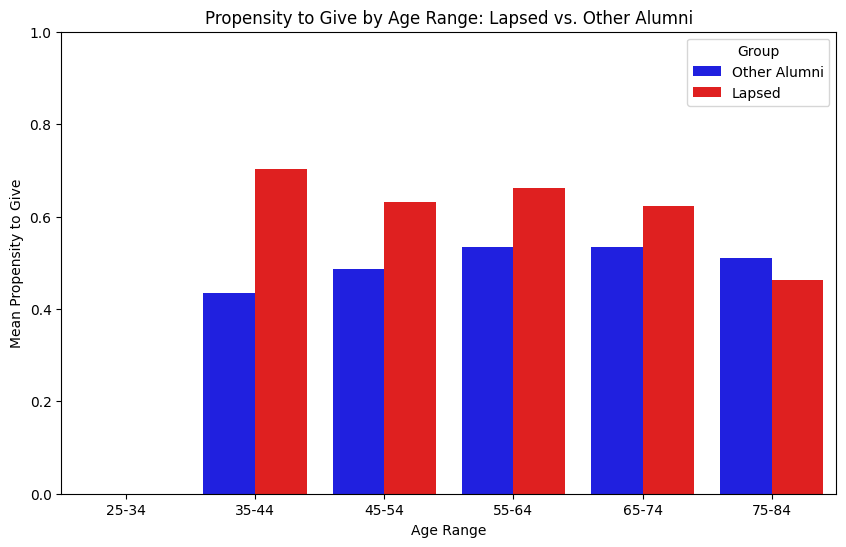

In [2]:
# Define age group order, adding "25-34"
age_order = ["25-34", "35-44", "45-54", "55-64", "65-74", "75-84"]

# Compute mean propensity to give for each age group in both datasets
df_age_comparison = pd.DataFrame({
    "Age Range": age_order,
    "Other Alumni": [df_other_clean[df_other_clean[age_col] == age][propensity_col].mean() for age in age_order],
    "Lapsed": [df_lapsed_clean[df_lapsed_clean[age_col] == age][propensity_col].mean() for age in age_order]
})

# Melt the dataframe for easier plotting
df_age_melted = df_age_comparison.melt(id_vars=["Age Range"], var_name="Group", value_name="Mean Propensity to Give")

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_age_melted, x="Age Range", y="Mean Propensity to Give", hue="Group", palette=["blue", "red"])
plt.title("Propensity to Give by Age Range: Lapsed vs. Other Alumni")
plt.ylabel("Mean Propensity to Give")
plt.ylim(0, 1)
plt.show()
